# Visualising Information - PROJECT

## Problem Statement - Based on the data, Find visual insights from it.

**Dataset Description**:


The **basic idea** of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. 


With such an overwhelming demand of restaurants it has therefore become **important to study the demography of a location**. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.


The data is accurate to that available on the zomato website until 15 March 2019. The data was scraped from Zomato in two phase. 

After going through the structure of the website it was found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars. 

**Phase I**, In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. 

**Phase II**, In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item was extracted.

**Column Description**
1. *url* - contains the url of the restaurant in the zomato website
addresscontains the address of the restaurant in Bengaluru
namecontains the name of the restaurant


2. *online_order* - whether online ordering is available in the restaurant or not


3. *book_table* - table book option available or not


4. *rate* - contains the overall rating of the restaurant out of 5


5. *votes* - contains total number of rating for the restaurant as of the above mentioned date


6. *phone* - contains the phone number of the restaurant


7. *location* - contains the neighborhood in which the restaurant is located
rest_typerestaurant type


8. *dish_liked* - dishes people liked in the restaurant
cuisinesfood styles, separated by comma


9. *approx_cost(for two people)* - contains the approximate cost for meal for two people


10. *reviews_list* - list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer


11. *menu_item* - contains list of menus available in the restaurant
listed_in(type)type of meal


12. *listed_in(city)* - contains the neighborhood in which the restaurant is listed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('zomato.csv')
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


# Question 1
**Analyse the number of Restaurants based on their Online Delivery by making a count plot**

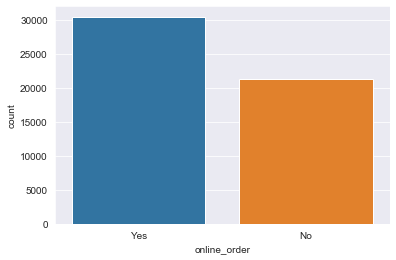

In [2]:
sns.set_style('darkgrid')
sns.countplot(df['online_order']);

# Question 2
**Analyse the number of Restaurants based on their Table booking facility by  making count plot**

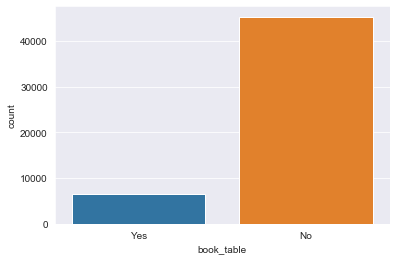

In [3]:
sns.countplot(df['book_table']);

# Question 3
**Analyse the number of Restaurants based on their Ratings using Pie Chart**

In [4]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))

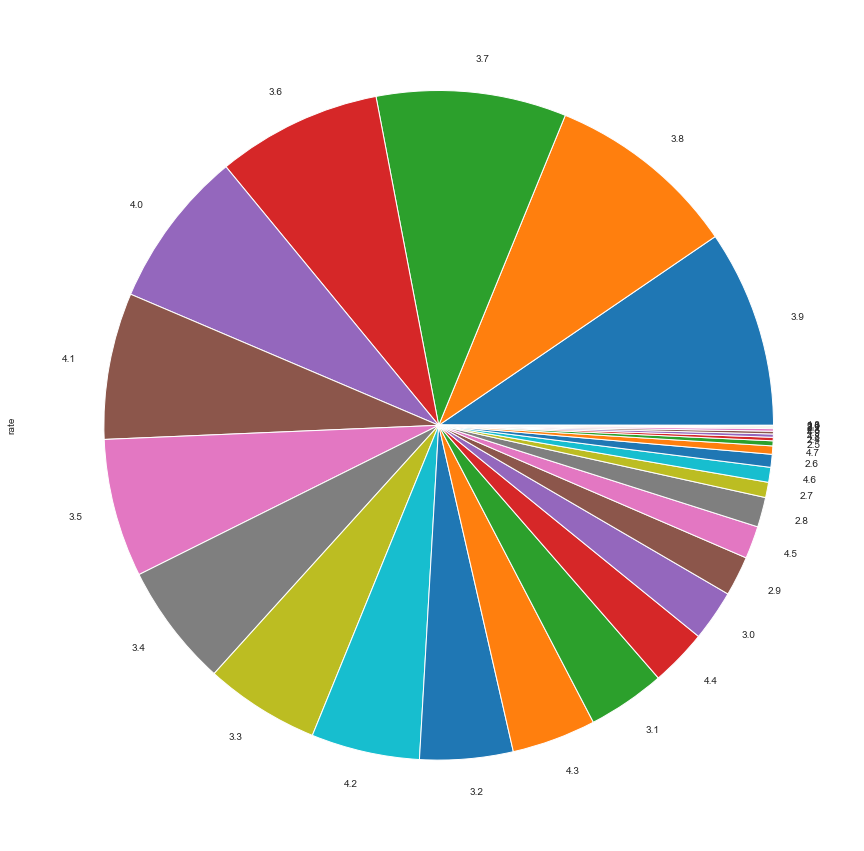

In [5]:
df['rate'].value_counts().plot.pie(figsize = (15,20))

# Question 4
**Analyse the number of Restaurants based on their Location using Horizontal Count Plot.**

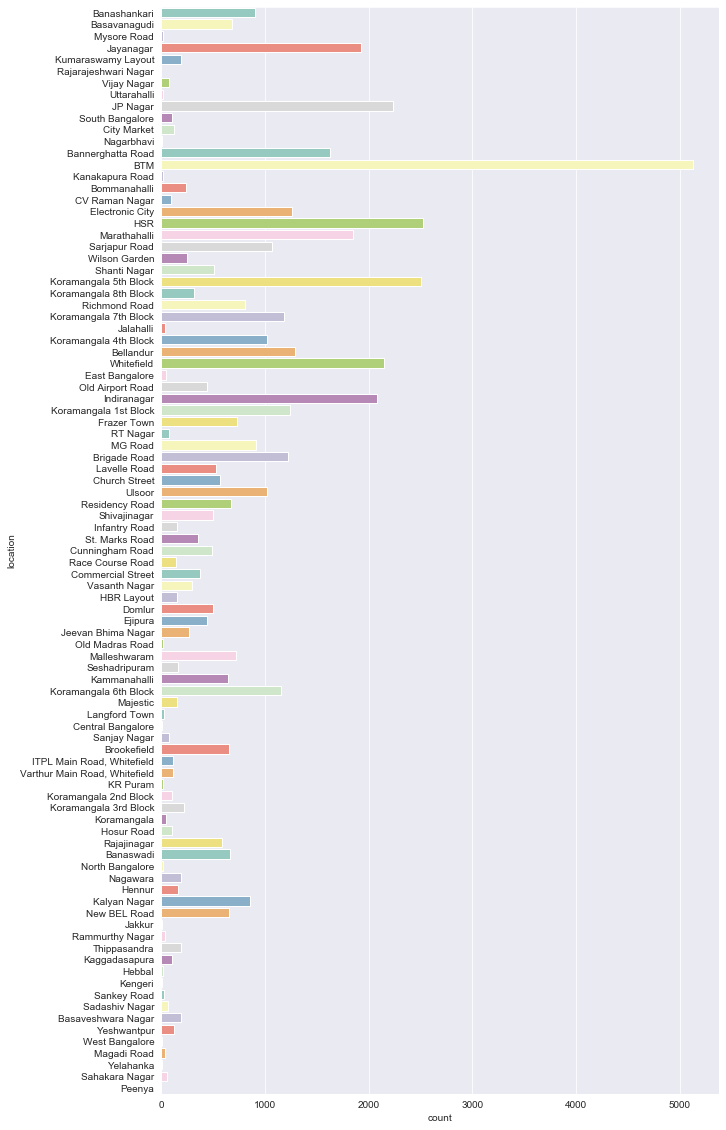

In [6]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['location'],palette = 'Set3');

# Question 5
**Analyse the number of Restaurants based on their Dining Type using Pie Chart**

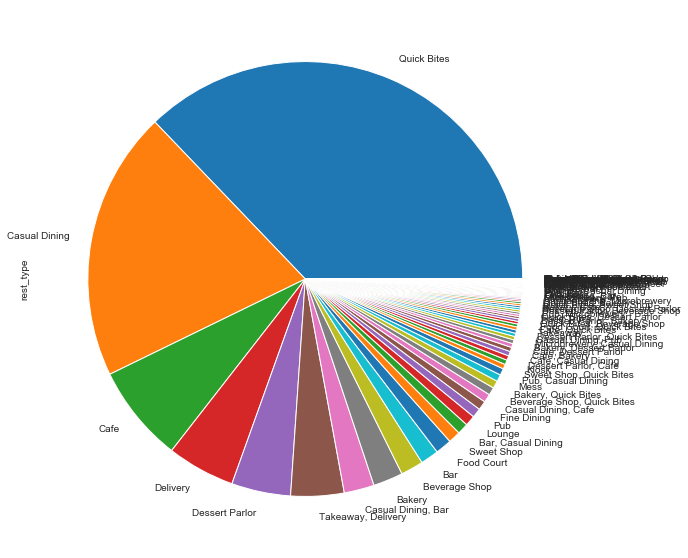

In [7]:
df['rest_type'].value_counts().plot.pie(figsize = (10,10))

# Question 6
**Analyse the votes using line plot.** What are the limitations you see?

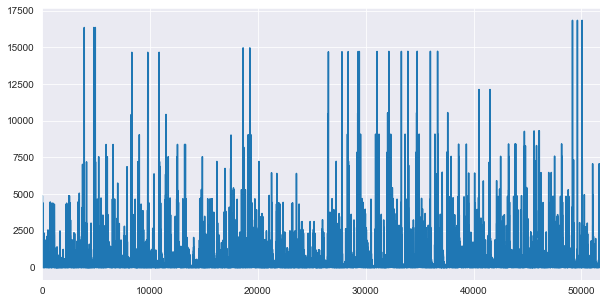

In [8]:
plt.figure(figsize = (10,5))
df['votes'].plot();

# Question 7
**Analyse the frequency of votes by drawing histogram of bins 5 (Overcoming the limitations of line plot).**

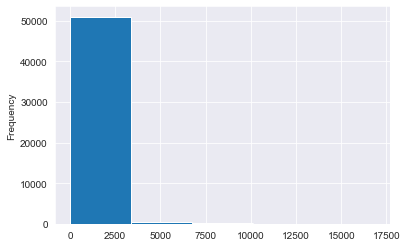

In [9]:
df['votes'].plot.hist(bins = 5);

# Question 8
**Make a line chart in which all votes are summed up.**

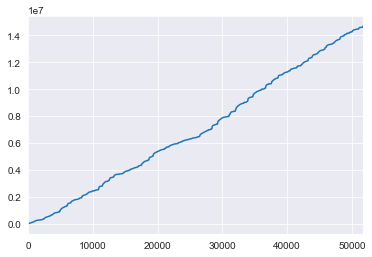

In [11]:
df['cumsum'] = df['votes'].cumsum()
df['cumsum'].plot();